In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
#read csv, print 5 rows
klangapi = pd.read_csv('klangapiCleanedDaily.csv')
klangapi.head()

,Date,Ws_hourly_avg,Wd_hourly_avg,Amb_temp_hourly_avg,Humidity_hourly_avg,Nox_hourly_avg,No_hourly_avg,So2_hourly_avg,No2_hourly_avg,O3_hourly_avg,Co_hourly_avg,Pm10_hourly_avg
0,2002-10-01,4.2125,170.1875,27.3729,72.7500,0.0751,0.0409,0.0097,0.0342,0.0241,2.3044,108.6875
1,2002-10-02,4.9542,111.8750,27.4375,72.8333,0.0601,0.0247,0.0077,0.0354,0.0203,1.7673,108.3333
2,2002-10-03,5.0542,123.2083,26.8250,77.0833,0.0610,0.0261,0.0119,0.0349,0.0191,1.7481,99.9583
3,2002-10-04,3.6958,134.3750,26.4875,79.2500,0.0871,0.0506,0.0121,0.0366,0.0191,2.4892,116.6250
4,2002-10-05,4.4708,188.9167,26.4750,80.3333,0.0539,0.0305,0.0072,0.0234,0.0165,1.7731,94.9583


In [19]:
#change column names for simplicity
klangapi.columns=['date','wind_speed','wind_direction','temperature','relative_humidity','nox','no','so2','no2','o3','co','pm10']


In [20]:
#check variables
klangapi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6405 entries, 0 to 6404
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               6405 non-null   object 
 1   wind_speed         6405 non-null   float64
 2   wind_direction     6405 non-null   float64
 3   temperature        6405 non-null   float64
 4   relative_humidity  6405 non-null   float64
 5   nox                6405 non-null   float64
 6   no                 6405 non-null   float64
 7   so2                6405 non-null   float64
 8   no2                6405 non-null   float64
 9   o3                 6405 non-null   float64
 10  co                 6405 non-null   float64
 11  pm10               6405 non-null   float64
dtypes: float64(11), object(1)
memory usage: 600.6+ KB


In [21]:
#check is missing data exist
klangapi.isnull().sum()

date                 0
wind_speed           0
wind_direction       0
temperature          0
relative_humidity    0
nox                  0
no                   0
so2                  0
no2                  0
o3                   0
co                   0
pm10                 0
dtype: int64

In [22]:
#check how many unique data in each variables
klangapi.nunique()

date                 6405
wind_speed           3594
wind_direction       3589
temperature          2830
relative_humidity    2202
nox                   731
no                    501
so2                   162
no2                   399
o3                    381
co                   4448
pm10                 3405
dtype: int64

In [23]:
#check duplicate data
klangapi[klangapi.duplicated() == True]


,date,wind_speed,wind_direction,temperature,relative_humidity,nox,no,so2,no2,o3,co,pm10


In [34]:
klangapi.describe()

,wind_speed,wind_direction,temperature,relative_humidity,nox,no,so2,no2,o3,co,pm10,month,year
count,6405.000000,6405.000000,6405.000000,6405.000000,6405.000000,6405.000000,6405.000000,6405.000000,6405.000000,6405.000000,6405.000000,6405.000000,6405.000000
mean,4.905068,174.089747,28.500145,72.555887,0.036046,0.015526,0.004327,0.020523,0.017246,0.998135,61.080157,6.518033,2011.138954
std,2.323605,54.106210,1.444406,7.411196,0.014735,0.010115,0.002654,0.006691,0.006872,0.416056,32.471464,3.484533,5.250537
min,0.556200,32.595700,22.429200,46.458300,0.004100,0.000300,0.000000,0.000000,0.000500,0.126700,11.688100,1.000000,2002.000000
25%,3.725000,142.333300,27.516700,67.541700,0.025200,0.007900,0.002500,0.015900,0.012400,0.726500,42.875000,3.000000,2007.000000
50%,5.075000,164.208300,28.550200,72.833300,0.034400,0.013500,0.003900,0.020100,0.016400,0.951200,55.208300,7.000000,2011.000000
75%,6.158200,197.000000,29.516700,77.625000,0.044700,0.021000,0.005600,0.024700,0.021200,1.204200,70.833300,10.000000,2015.000000
max,11.991800,348.607800,34.533200,96.531800,0.125400,0.085400,0.027700,0.045800,0.052000,6.094800,600.083300,12.000000,2020.000000


In [24]:
#check if inconsistent data exist such as value 0
klangapi[(klangapi == 0.0).any(axis=1)]

,date,wind_speed,wind_direction,temperature,relative_humidity,nox,no,so2,no2,o3,co,pm10
3920,2013-06-25,5.4750,166.1667,30.5083,67.4583,0.0041,0.0041,0.008,0.0000,0.0282,5.3062,420.2917
3921,2013-06-26,4.8625,196.6667,28.3208,76.7500,0.0074,0.0074,0.008,0.0000,0.0143,1.9110,107.0000
3922,2013-06-27,6.7375,204.4583,29.3208,71.0833,0.0108,0.0108,0.008,0.0000,0.0109,0.9733,57.8750
4684,2015-07-29,8.7777,145.1667,30.1333,55.5000,0.0214,0.0059,0.000,0.0154,0.0277,0.3921,53.3333
4700,2015-08-14,8.6316,71.2500,28.5042,67.8750,0.0358,0.0117,0.000,0.0241,0.0206,0.8177,44.7083
4701,2015-08-15,8.6225,132.5833,29.4542,65.4167,0.0258,0.0049,0.000,0.0209,0.0316,0.7706,71.1667
4702,2015-08-16,8.6134,132.7083,29.0625,65.3333,0.0249,0.0053,0.000,0.0196,0.0244,0.6817,64.5833


In [33]:
klangapi['date'] = pd.to_datetime(klangapi['date'], format='%Y-%m-%d')
klangapi['month'] = klangapi.loc[:, "date"].dt.month
klangapi['year'] = klangapi.loc[:, "date"].dt.year
klangapi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6405 entries, 0 to 6404
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               6405 non-null   datetime64[ns]
 1   wind_speed         6405 non-null   float64       
 2   wind_direction     6405 non-null   float64       
 3   temperature        6405 non-null   float64       
 4   relative_humidity  6405 non-null   float64       
 5   nox                6405 non-null   float64       
 6   no                 6405 non-null   float64       
 7   so2                6405 non-null   float64       
 8   no2                6405 non-null   float64       
 9   o3                 6405 non-null   float64       
 10  co                 6405 non-null   float64       
 11  pm10               6405 non-null   float64       
 12  month              6405 non-null   int64         
 13  year               6405 non-null   int64         
dtypes: datet

In [28]:
#aggregaate data according to month with mean
data = klangapi.groupby('month', as_index=False).agg({'wind_speed':'mean', 'wind_direction':'mean', 'temperature':'mean', 'relative_humidity':'mean', 'nox':'mean', 'no':'mean', 'so2':'mean', 'no2':'mean', 'o3':'mean', 'co':'mean', 'pm10':'mean'})
data

,month,wind_speed,wind_direction,temperature,relative_humidity,nox,no,so2,no2,o3,co,pm10
0,1,4.593761,189.358526,28.074056,73.640508,0.039322,0.016514,0.004162,0.022812,0.018606,1.004201,56.145683
1,2,4.428461,180.932579,28.731515,70.771605,0.035857,0.013740,0.004496,0.022118,0.020779,1.064861,65.201784
2,3,4.574595,185.459162,29.101074,71.478031,0.036708,0.014621,0.004442,0.022080,0.019912,1.005126,64.793796
3,4,4.754507,175.275885,28.941270,74.270758,0.038089,0.016318,0.004626,0.021783,0.018487,0.999752,55.265480
4,5,4.905680,172.616345,28.933121,72.379281,0.033213,0.014102,0.004588,0.019123,0.016686,0.949740,55.642646
5,6,5.052787,160.429645,28.861106,69.280025,0.030575,0.012671,0.004649,0.017892,0.016596,1.020227,70.157386
6,7,5.079957,155.424779,28.574374,70.299286,0.031341,0.013514,0.004217,0.017813,0.015547,0.976026,68.973651
7,8,5.522603,156.771106,28.746433,69.894749,0.030076,0.011604,0.003947,0.018482,0.016840,0.985220,71.710143
8,9,5.329577,163.636384,28.486918,71.213708,0.033508,0.014037,0.004361,0.019475,0.016852,0.986259,67.196191
9,10,5.229060,185.422903,28.182878,73.847071,0.039036,0.017408,0.004246,0.021632,0.017075,0.989005,60.794979


In [19]:
#sort the data type based on month
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
data['month'] = pd.Categorical(data['month'], categories=month_order, ordered=True)
data.sort_values(by=['month'], inplace=True)
data

,month,wind_speed,wind_direction,temperature,uvb,relative_humidity,nox,no,so2,no2,o3,co,pm10
4,January,3.992937,3.009729,28.085455,113.974353,73.838812,0.039670,0.016884,0.004186,0.022806,0.018618,1.005081,56.141333
3,February,3.937554,2.939238,28.691595,123.249198,71.029246,0.036208,0.013961,0.004503,0.022257,0.020851,1.077519,65.133642
7,March,4.073996,3.090448,29.050161,129.040595,71.805740,0.037104,0.014833,0.004434,0.022263,0.020280,1.020910,64.960851
0,April,4.215755,2.969294,28.892967,127.874151,74.559168,0.038252,0.016470,0.004635,0.021818,0.018457,1.006243,55.268367
8,May,4.373814,3.023469,28.960793,129.989400,72.654376,0.033742,0.014342,0.004603,0.019484,0.016338,0.958414,55.747148
6,June,4.532580,2.801306,28.900769,122.462249,70.069247,0.031633,0.012949,0.004676,0.018657,0.016514,1.033929,70.127247
5,July,4.622727,2.716410,28.563562,127.692474,70.300852,0.031985,0.013789,0.004245,0.018231,0.015488,0.988649,68.931021
1,August,4.763820,2.753476,28.749571,136.984744,69.893397,0.030321,0.011806,0.003953,0.018546,0.016769,0.991120,71.666127
11,September,4.606010,2.821045,28.486880,140.513161,71.212337,0.033861,0.014257,0.004376,0.019647,0.016731,0.996488,67.262047
10,October,4.610423,3.008670,28.176514,135.821563,73.836052,0.038108,0.017124,0.004233,0.020962,0.017052,1.002097,60.887973


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 4 to 2
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   month              12 non-null     category
 1   wind_speed         12 non-null     float64 
 2   wind_direction     12 non-null     float64 
 3   temperature        12 non-null     float64 
 4   uvb                12 non-null     float64 
 5   relative_humidity  12 non-null     float64 
 6   nox                12 non-null     float64 
 7   no                 12 non-null     float64 
 8   so2                12 non-null     float64 
 9   no2                12 non-null     float64 
 10  o3                 12 non-null     float64 
 11  co                 12 non-null     float64 
 12  pm10               12 non-null     float64 
dtypes: category(1), float64(12)
memory usage: 1.6 KB


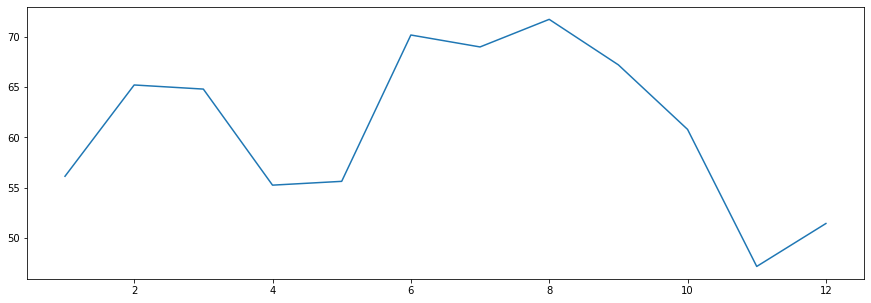

In [29]:
# data.plot(x='month', y=['pm10'])
plt.figure(figsize=(15, 5))
plt.plot(data['month'],data['pm10'])
plt.show()

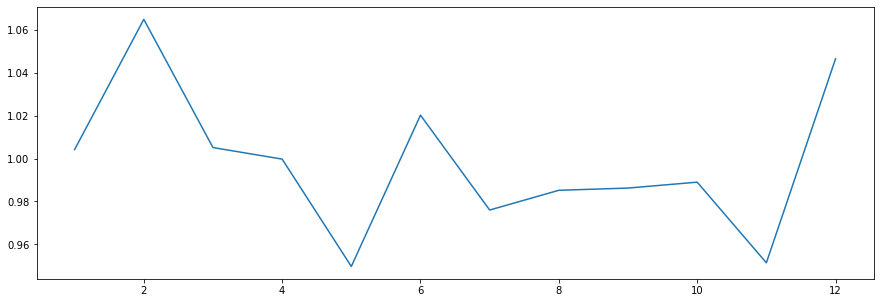

In [30]:
# data.plot(x='month', y=['co'])
plt.figure(figsize=(15, 5))
plt.plot(data['month'],data['co'])
plt.show()

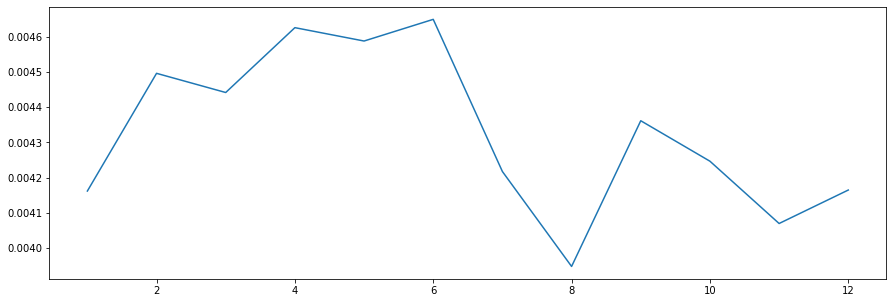

In [31]:
plt.figure(figsize=(15, 5))

plt.plot(data['month'],data['so2'])

plt.show()

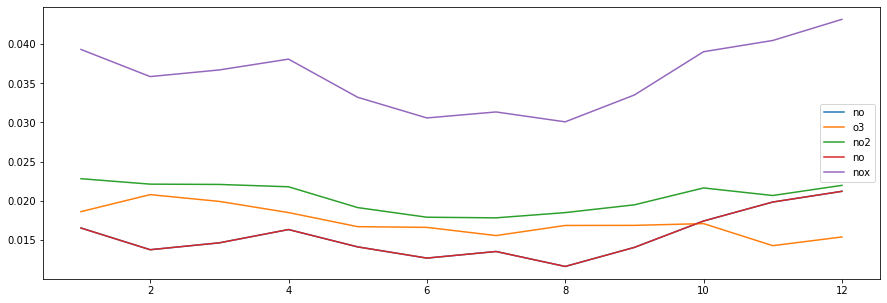

In [32]:
#data.plot(x='month', y=['no','o3','no2','so2','no','nox'])
plt.figure(figsize=(15, 5))

plt.plot(data['month'],data[['no','o3','no2','no','nox']])
plt.legend(['no','o3','no2','no','nox'])

plt.show()

In [35]:
data = klangapi.groupby('year', as_index=False).agg({'wind_speed':'mean', 'wind_direction':'mean', 'temperature':'mean', 'relative_humidity':'mean', 'nox':'mean', 'no':'mean', 'so2':'mean', 'no2':'mean', 'o3':'mean', 'co':'mean', 'pm10':'mean'})
data

,year,wind_speed,wind_direction,temperature,relative_humidity,nox,no,so2,no2,o3,co,pm10
0,2002,4.731116,162.266537,27.231816,78.585600,0.052217,0.028173,0.006352,0.024043,0.013917,1.357688,64.531250
1,2003,4.937210,170.822885,27.769214,76.279794,0.045222,0.022978,0.007419,0.022230,0.013937,1.186560,67.342812
2,2004,4.549431,153.041553,28.129160,75.422133,0.044293,0.022899,0.007860,0.021379,0.016186,1.171181,73.261329
3,2005,4.963840,174.783105,28.713852,74.334931,0.039143,0.018415,0.006259,0.020728,0.015676,1.050215,78.490580
4,2006,4.742676,160.842750,28.594681,72.840640,0.041032,0.018625,0.005119,0.022413,0.013369,0.990353,65.984758
5,2007,4.995135,161.878995,29.717153,69.750002,0.034702,0.015838,0.003712,0.018854,0.016188,0.759384,52.867752
6,2008,4.487318,159.092530,27.411277,71.470968,0.038674,0.017341,0.004056,0.021338,0.017986,0.840302,64.437443
7,2009,5.114293,187.051563,27.682733,67.545773,0.035136,0.015125,0.003896,0.019996,0.020602,0.950978,65.386872
8,2010,6.144395,183.844234,27.872978,72.771404,0.036778,0.015757,0.004172,0.021011,0.019899,1.058595,59.051485
9,2011,5.931694,171.178193,27.781086,73.423172,0.043266,0.018589,0.005418,0.024641,0.019078,1.099905,62.860674


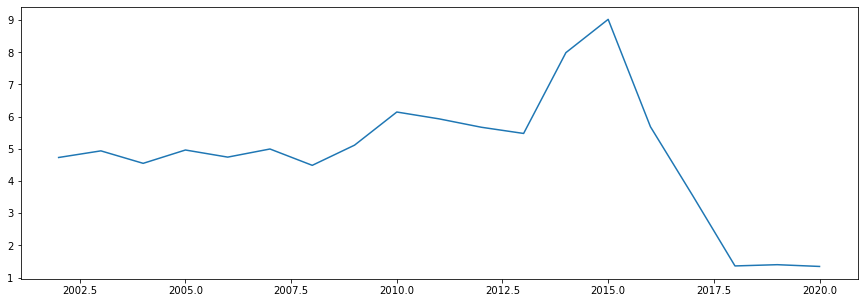

In [41]:
# data.plot(x='month', y=['co'])
plt.figure(figsize=(15, 5))
plt.plot(data['year'],data['wind_speed'])
plt.show()

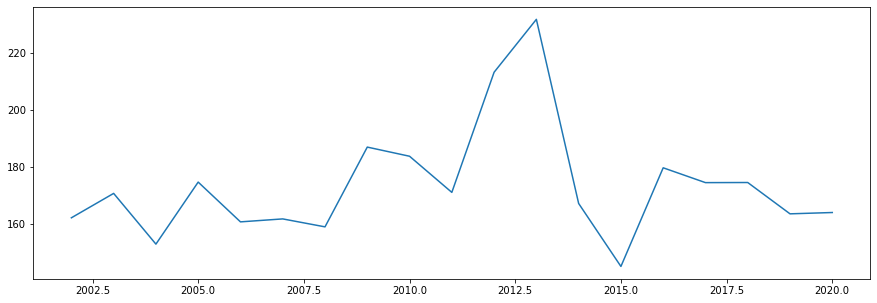

In [42]:
plt.figure(figsize=(15, 5))
plt.plot(data['year'],data['wind_direction'])
plt.show()

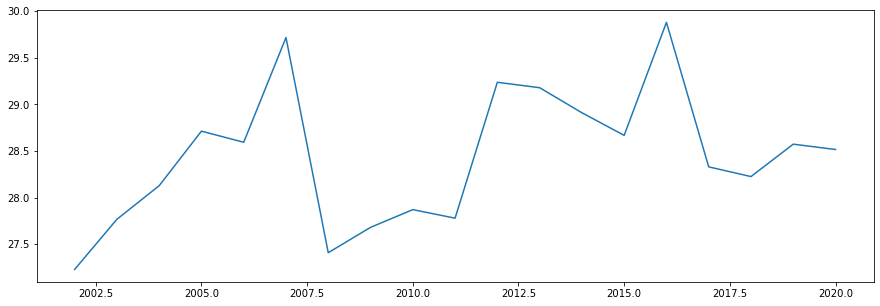

In [43]:
plt.figure(figsize=(15, 5))
plt.plot(data['year'],data['temperature'])
plt.show()

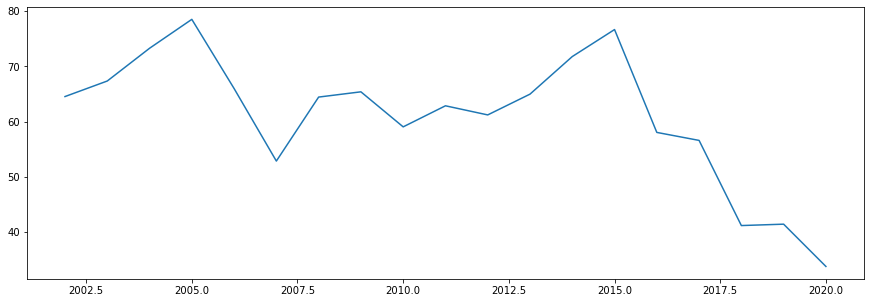

In [36]:
# data.plot(x='month', y=['pm10'])
plt.figure(figsize=(15, 5))
plt.plot(data['year'],data['pm10'])
plt.show()

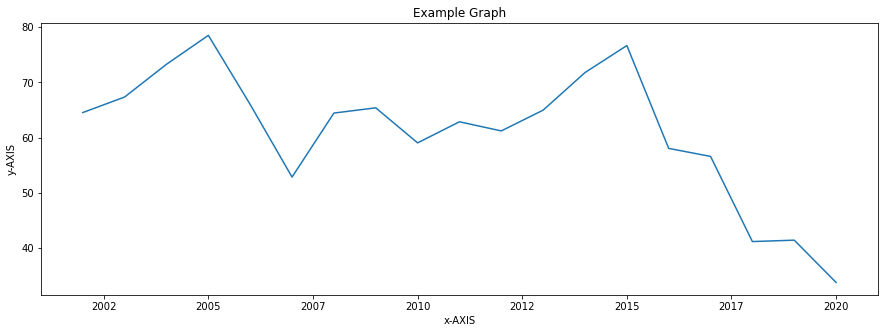

In [37]:
# # data.plot(x='month', y=['pm10'])
# plt.figure(figsize=(15, 5))
# plt.plot(data['year'],data['pm10'])
# plt.show()

from matplotlib.ticker import FormatStrFormatter


# create a figure and axes
fig, ax = plt.subplots(figsize=(15, 5))
  
ax.set_title('Example Graph')
  
ax.set_ylabel('y-AXIS')
ax.set_xlabel('x-AXIS')
# set x, y-axis limits 
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))

ax.set_xlim(2001, 2021)
# ax.set_ylim(0, 10)
  
# function to plot and show graph
ax.plot(data['year'],data['pm10'])
plt.show()

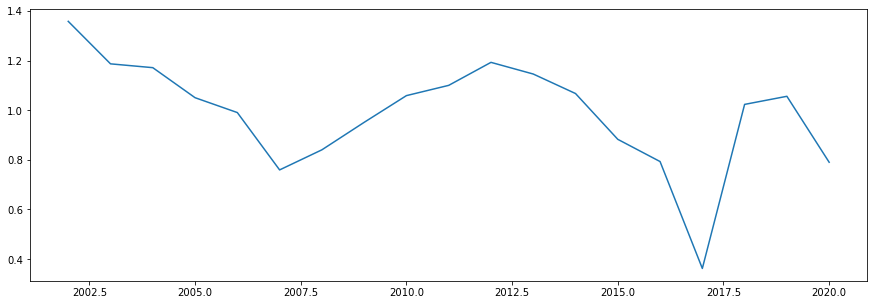

In [38]:
# data.plot(x='month', y=['co'])
plt.figure(figsize=(15, 5))
plt.plot(data['year'],data['co'])
plt.show()

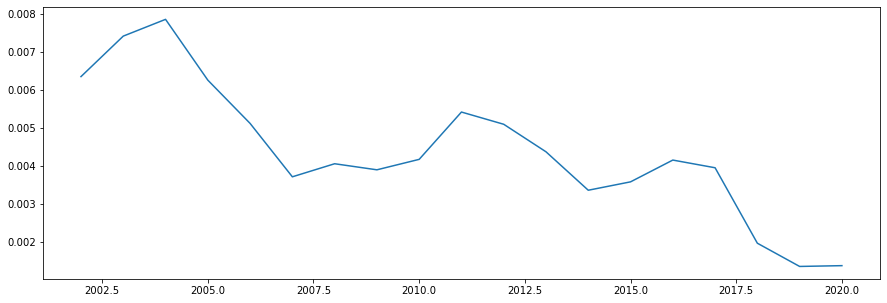

In [39]:
plt.figure(figsize=(15, 5))
plt.plot(data['year'],data['so2'])
plt.show()

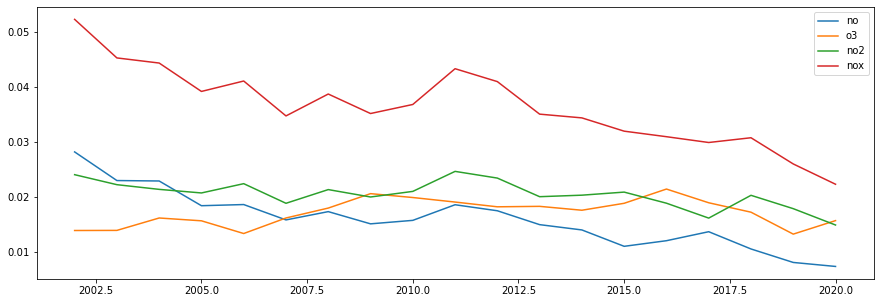

In [40]:
#data.plot(x='month', y=['no','o3','no2','so2','no','nox'])
plt.figure(figsize=(15, 5))

plt.plot(data['year'],data[['no','o3','no2','nox']])
plt.legend(['no','o3','no2','nox'])

plt.show()

<AxesSubplot:xlabel='year', ylabel='pm10'>

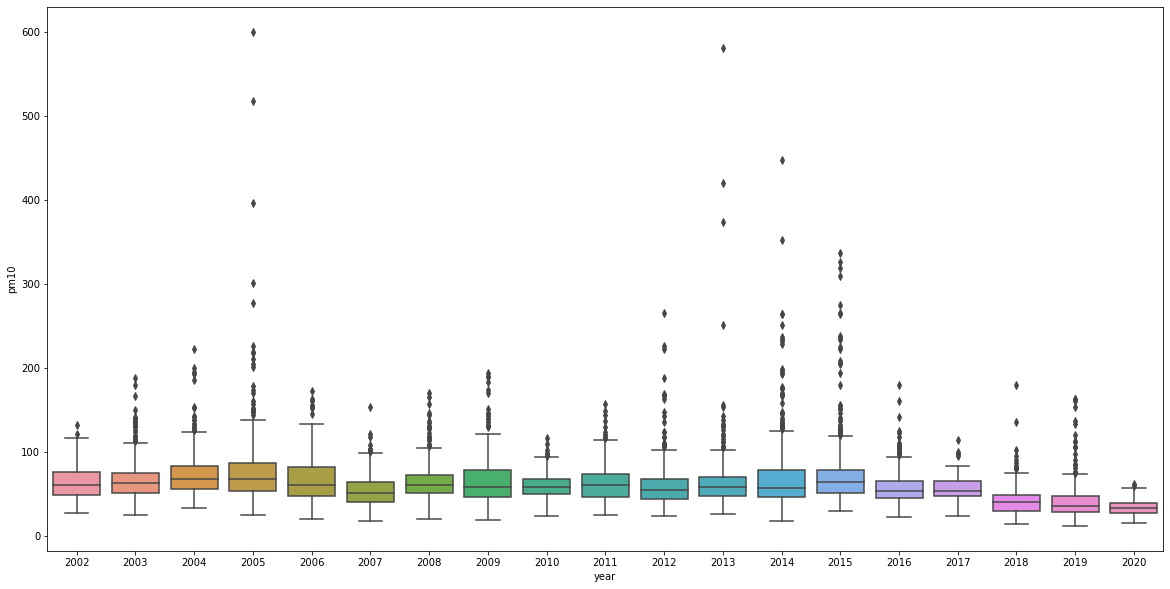

In [44]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.boxplot(ax=ax, x='year', y='pm10', data=klangapi)


<AxesSubplot:xlabel='year', ylabel='co'>

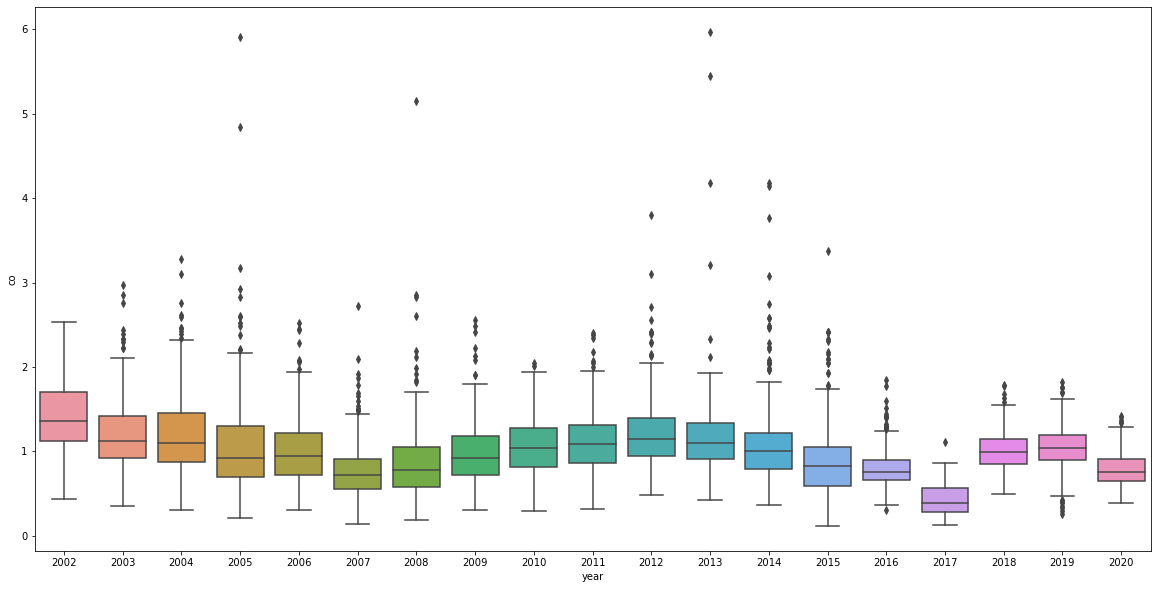

In [37]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.boxplot(ax=ax, x='year', y='co', data=klangapinew)

<AxesSubplot:xlabel='year', ylabel='o3'>

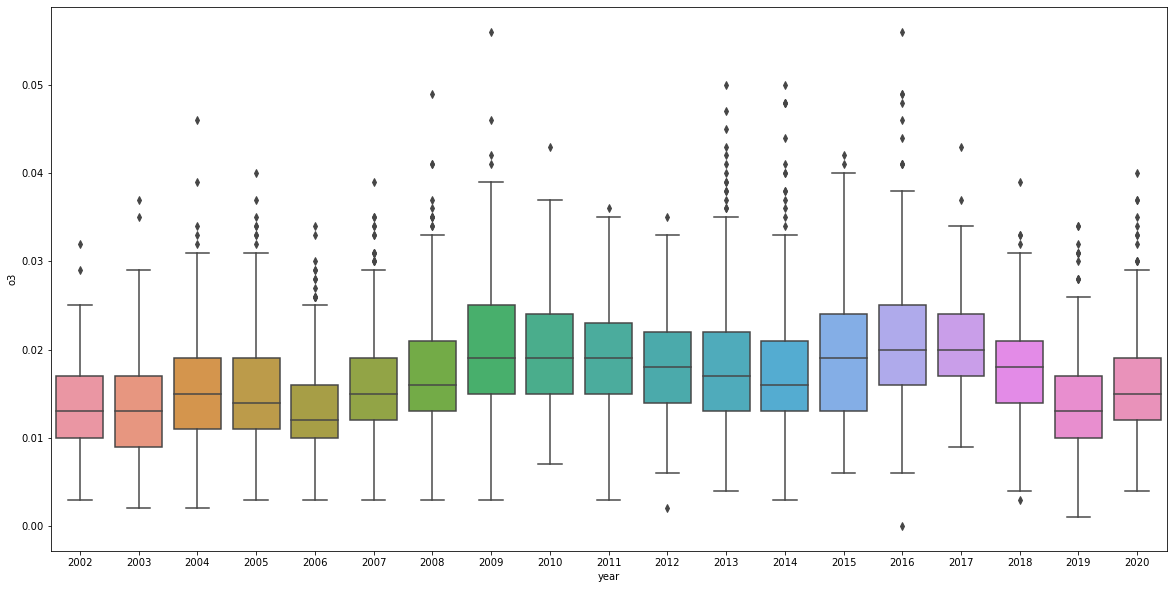

In [38]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.boxplot(ax=ax, x='year', y='o3', data=klangapinew)

<AxesSubplot:xlabel='year', ylabel='no2'>

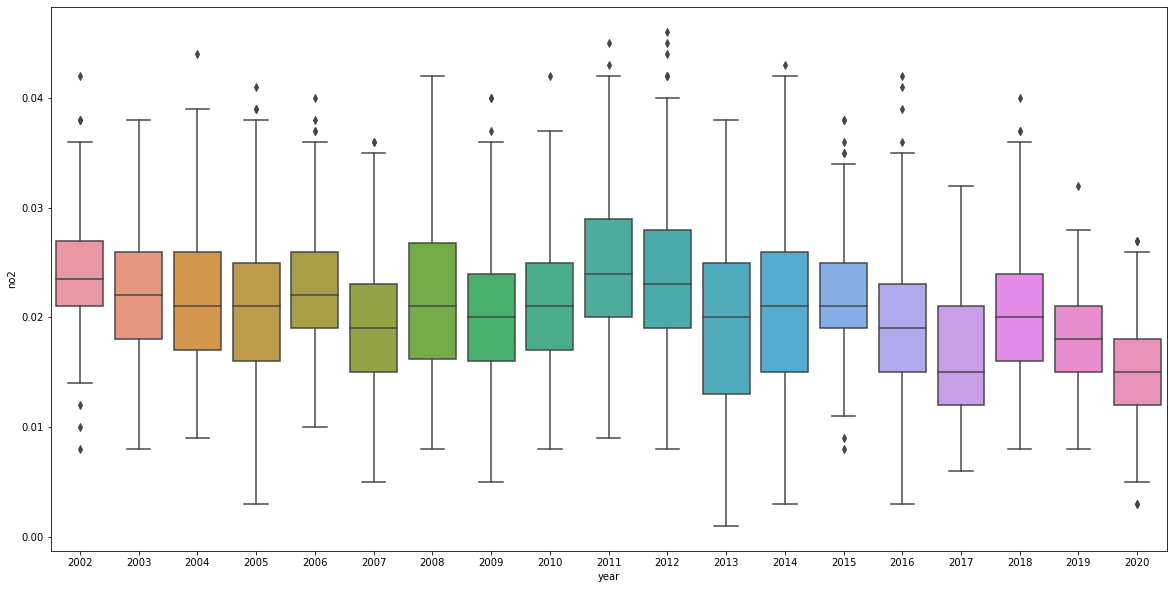

In [39]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.boxplot(ax=ax, x='year', y='no2', data=klangapinew)

<AxesSubplot:xlabel='year', ylabel='so2'>

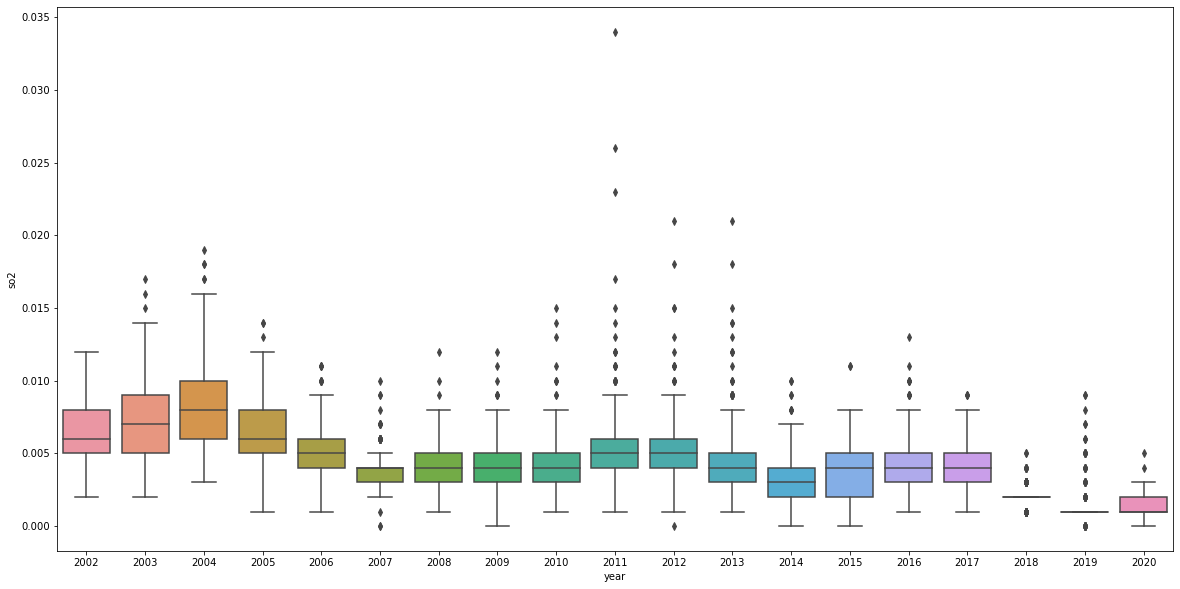

In [40]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.boxplot(ax=ax, x='year', y='so2', data=klangapinew)

<AxesSubplot:xlabel='year', ylabel='no'>

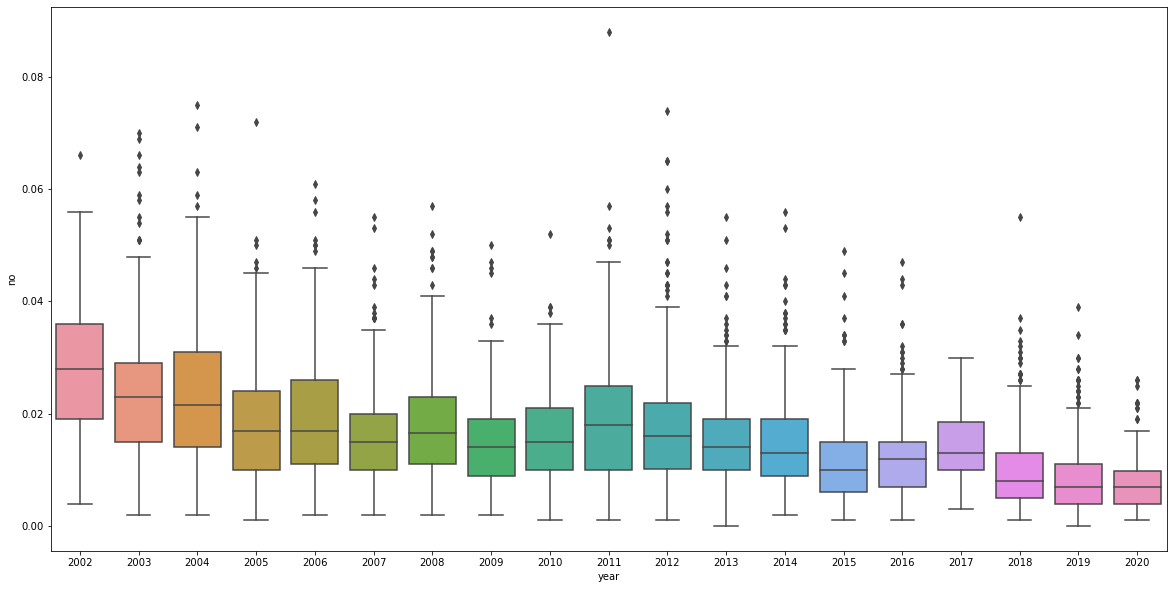

In [41]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.boxplot(ax=ax, x='year', y='no', data=klangapinew)

<AxesSubplot:xlabel='year', ylabel='nox'>

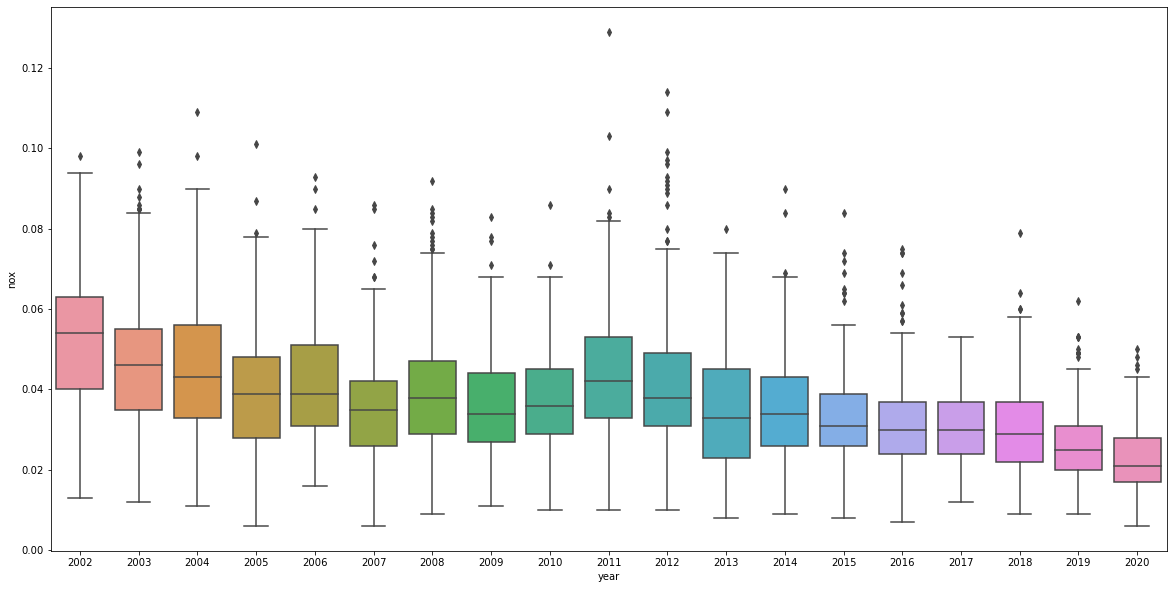

In [42]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.boxplot(ax=ax, x='year', y='nox', data=klangapinew)

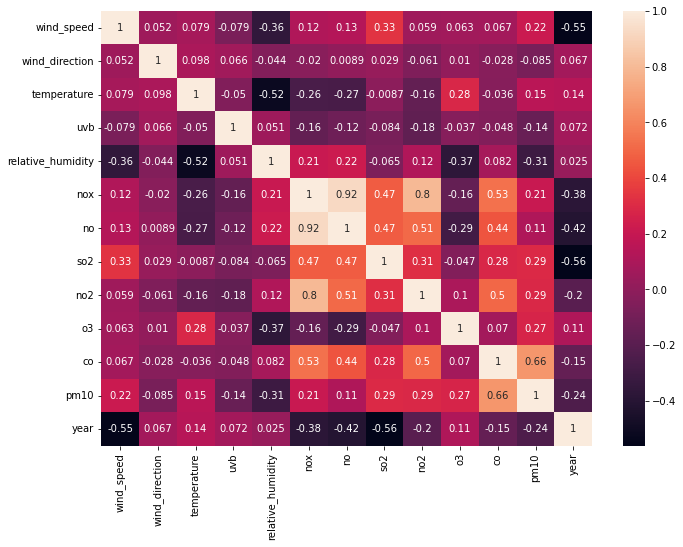

In [46]:
#boxplot by year
#summary table 
#correlation table (matrix+color)

corr = klangapinew.corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [ ]:
#data preprocessing
#replace missing value - linear interpolation
#remove data 0.0
#transform data from hourly to daily